In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="0"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [2]:
print("\n\n")
print("  numpy version:  %s" % str(np.version.version) )
print("  tensorflow version:  %s" % str(tf.__version__))
print("\n\n")




  numpy version:  1.21.5
  tensorflow version:  2.11.0





## Set model and resolution parameters

In [3]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [4]:

ngen_train = 100000
ngen_true = 10000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen_train)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

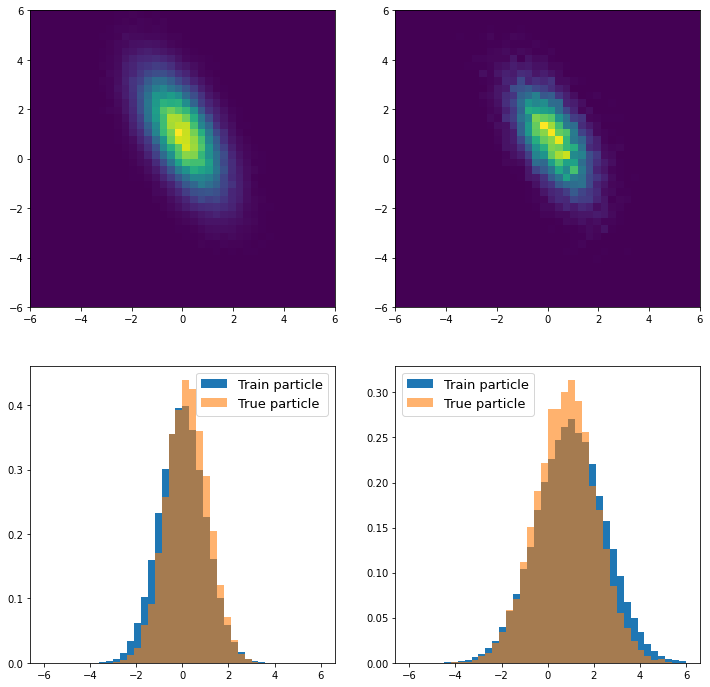

In [5]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [6]:
train_diff = train_det_pts - train_pts

In [7]:
diff_cov = np.cov( train_diff.T )

In [8]:
diff_cov

array([[0.24976146, 0.00079242],
       [0.00079242, 0.63997484]])

In [9]:
np.sqrt(diff_cov[0,0])

0.49976140289134385

In [10]:
np.sqrt(diff_cov[1,1])

0.7999842734766843

<function matplotlib.pyplot.show(close=None, block=None)>

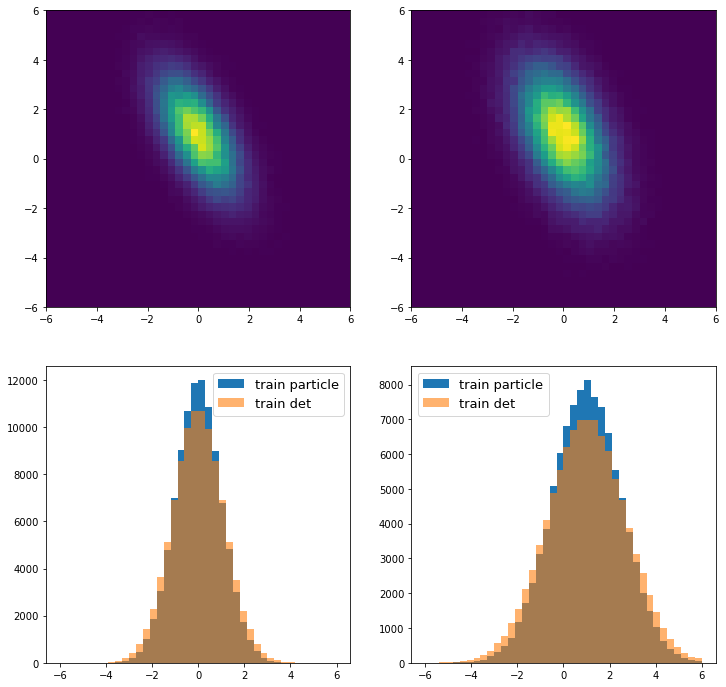

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

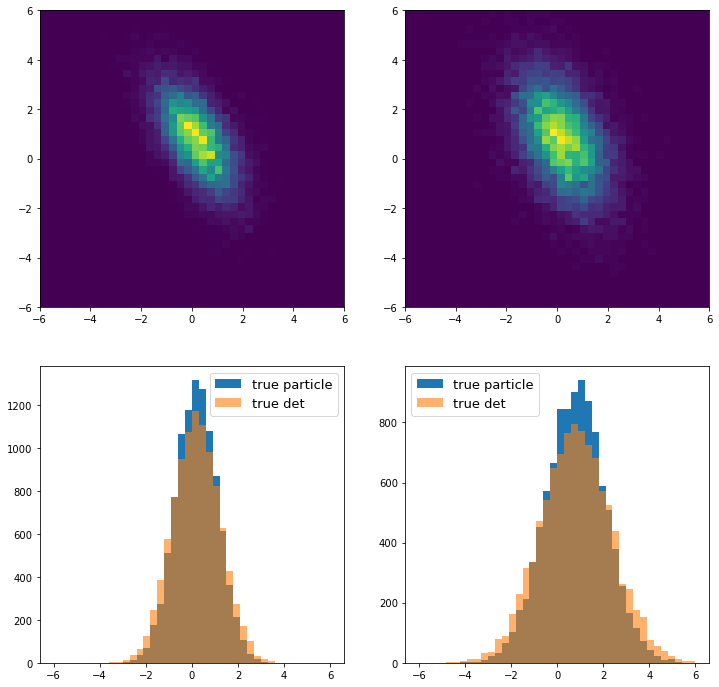

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

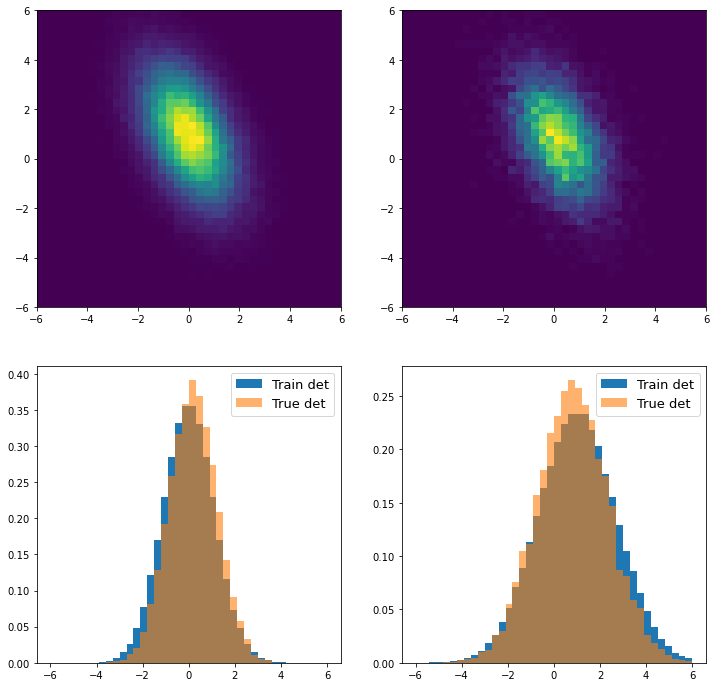

In [13]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [14]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-27 13:54:40.878221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 13:54:40.894237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 13:54:40.894475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 13:54:40.897725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 13:54:40.897912: I tensorflow/compiler/xla/stream_executo

## Package the training data for OmniFold

In [15]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [16]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (100000, 2)
  shape of theta_unknown_S : (10000, 2)
  shape of xvals_1 :  (110000, 2)



  shape of labels0 : (100000,)
  shape of labels_unknown : (10000,)
  shape of yvals_1 :  (110000,)



  shape of theta0_G : (100000, 2)
  shape of xvals_2 :  (200000, 2)
  shape of yvals_2 :  (200000,)




ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-27 13:54:42.611845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 13:54:42.614298: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f3f9801c080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 13:54:42.614326: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-27 13:54:42.621226: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 13:54:42.731413: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 21ms/step - loss: 0.5747 - accuracy: 0.4544 - val_loss: 0.4977 - val_accuracy: 0.4550
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4563 - accuracy: 0.4544 - val_loss: 0.3988 - val_accuracy: 0.4550
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.4544 - val_loss: 0.3423 - val_accuracy: 0.4550
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.4544 - val_loss: 0.3290 - val_accuracy: 0.4550
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.4544 - val_loss: 0.3260 - val_accuracy: 0.4550
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.4544 - val_loss: 0.3203 - val_accuracy: 0.4550
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.4544 - val_loss: 0.3169 - val_accuracy: 0.4550
Epoch 8/20
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 0.1258 - accuracy: 0.2766 - val_loss: 0.1245 - val_accuracy: 0.2144
Epoch 19/20
9/9 [==============================] - 0s 4ms/step - loss: 0.1258 - accuracy: 0.2153 - val_loss: 0.1245 - val_accuracy: 0.2332
Epoch 20/20
10/10 [==============================] - 0s 648us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.2085 - accuracy: 0.2535 - val_loss: 0.1656 - val_accuracy: 0.2507
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.2498 - val_loss: 0.1653 - val_accuracy: 0.2507
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.2498 - val_loss: 0.1653 - val_accuracy: 0.2507
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.2498 - val_loss: 0.1653 - val_accuracy: 0.2507
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1654 

75/75 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.2503 - val_loss: 0.1678 - val_accuracy: 0.2492
Epoch 15/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.2503 - val_loss: 0.1678 - val_accuracy: 0.2492
Epoch 16/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.2503 - val_loss: 0.1678 - val_accuracy: 0.2492
Epoch 17/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.2503 - val_loss: 0.1678 - val_accuracy: 0.2492
Epoch 18/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.2503 - val_loss: 0.1678 - val_accuracy: 0.2492
Epoch 19/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.2503 - val_loss: 0.1678 - val_accuracy: 0.2492
Epoch 20/20
10/10 [==============================] - 0s 630us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
9/9 [==============================] - 1s 18ms

In [17]:
of_weights

array([[[0.09968735, 0.12589177, 0.12124477, ..., 0.02649337,
         0.0860341 , 0.13072969],
        [0.081437  , 0.12377141, 0.09155169, ..., 0.03558856,
         0.10633132, 0.127243  ]],

       [[0.9591381 , 1.08067596, 1.03566098, ..., 0.92807305,
         0.87648076, 1.05715454],
        [0.07683403, 0.13085748, 0.08125468, ..., 0.03000202,
         0.10388789, 0.13758782]],

       [[1.01966941, 1.07739294, 1.06993985, ..., 1.03449512,
         0.99599165, 0.98901182],
        [0.08445463, 0.1396763 , 0.08683598, ..., 0.03159605,
         0.10725058, 0.14351305]],

       [[0.90923643, 0.93977219, 0.94828796, ..., 0.90478355,
         0.91738772, 0.93832427],
        [0.09465298, 0.13453725, 0.09203108, ..., 0.03426026,
         0.10854194, 0.13583712]]])

In [18]:
np.shape( of_weights)

(4, 2, 100000)

<function matplotlib.pyplot.show(close=None, block=None)>

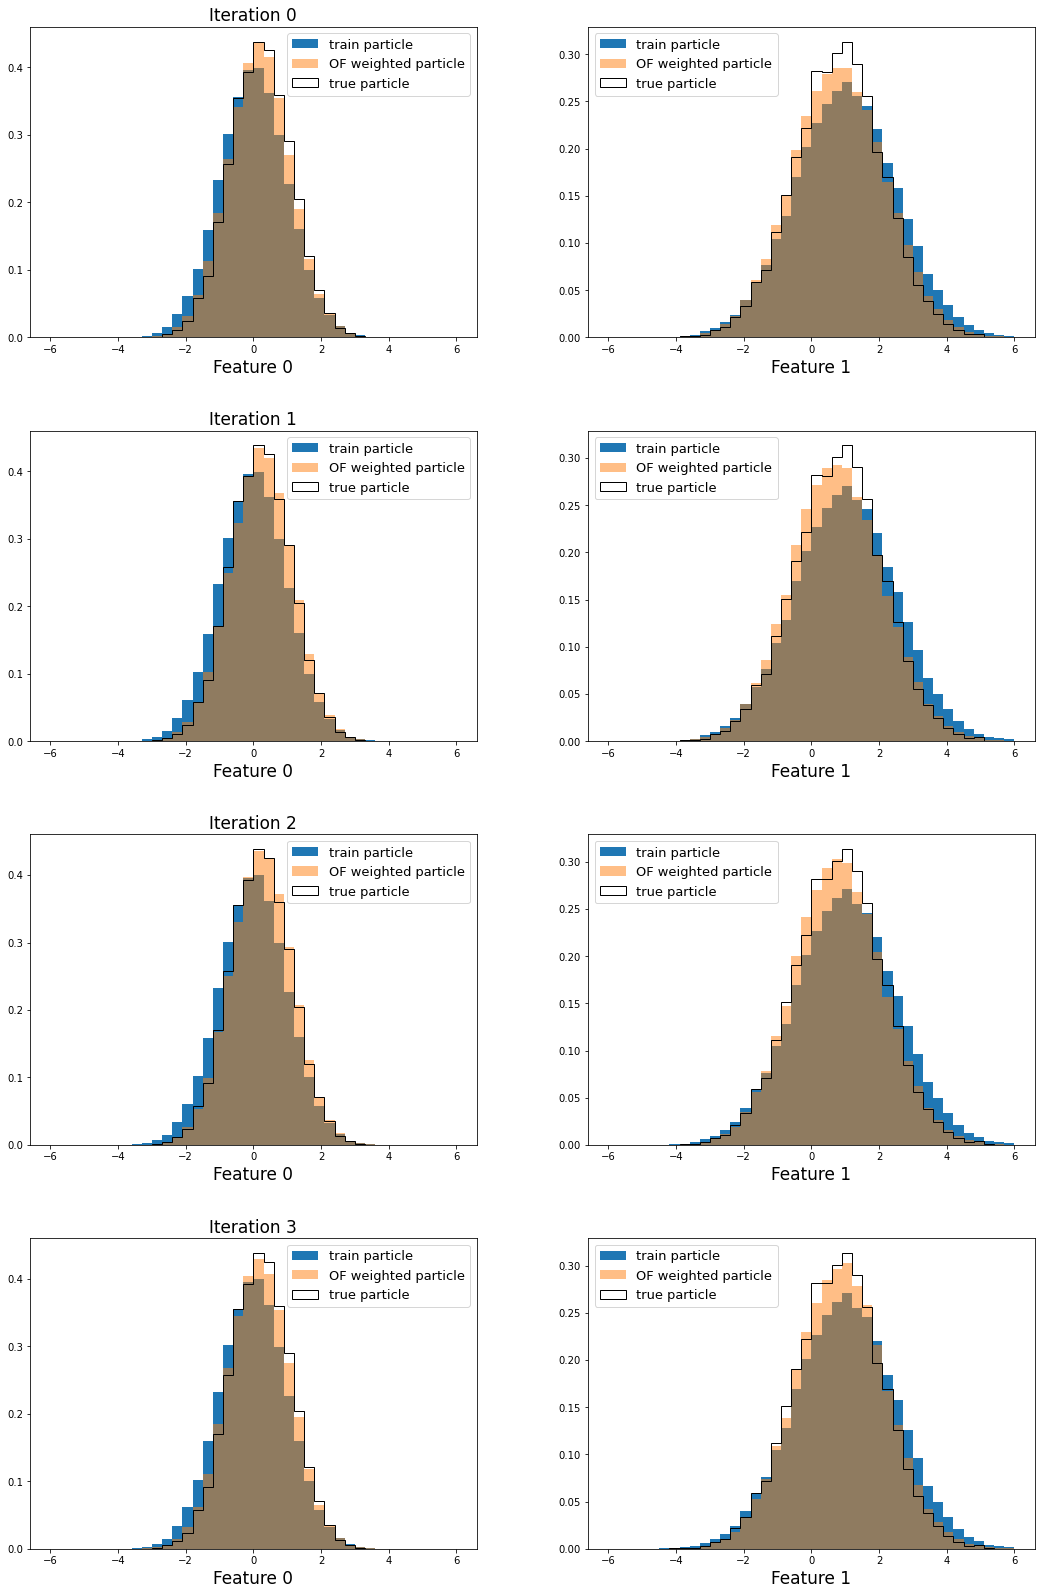

In [19]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

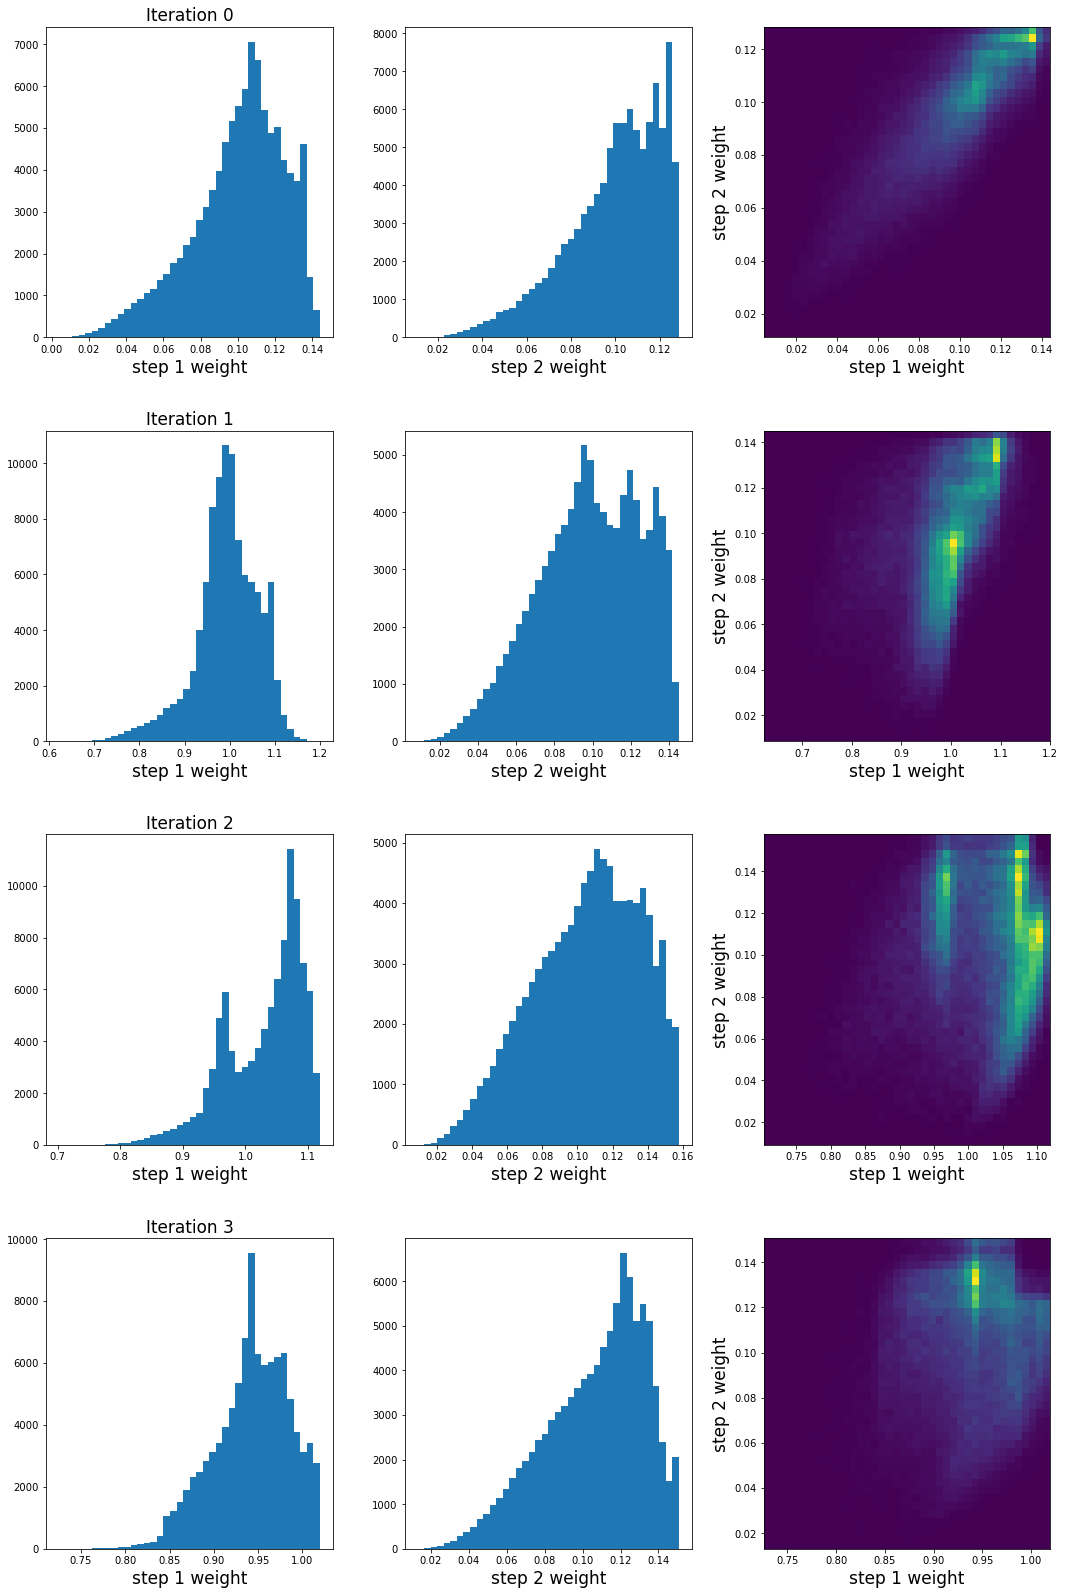

In [20]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

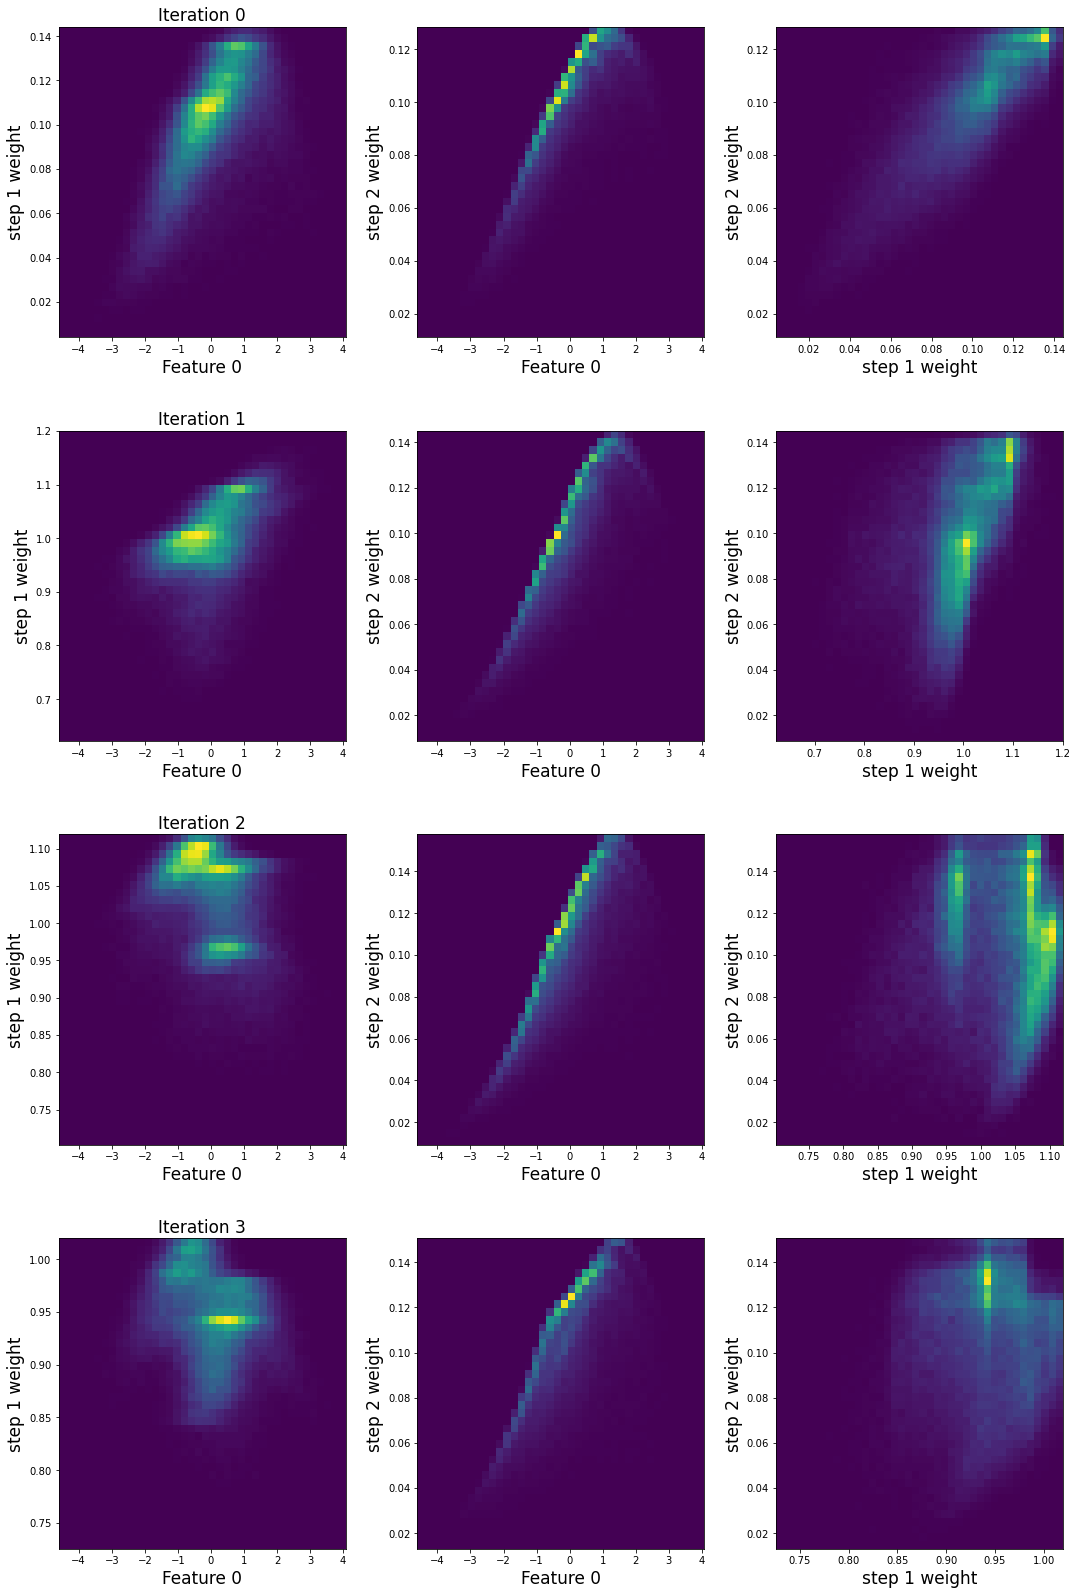

In [21]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,0], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,0], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

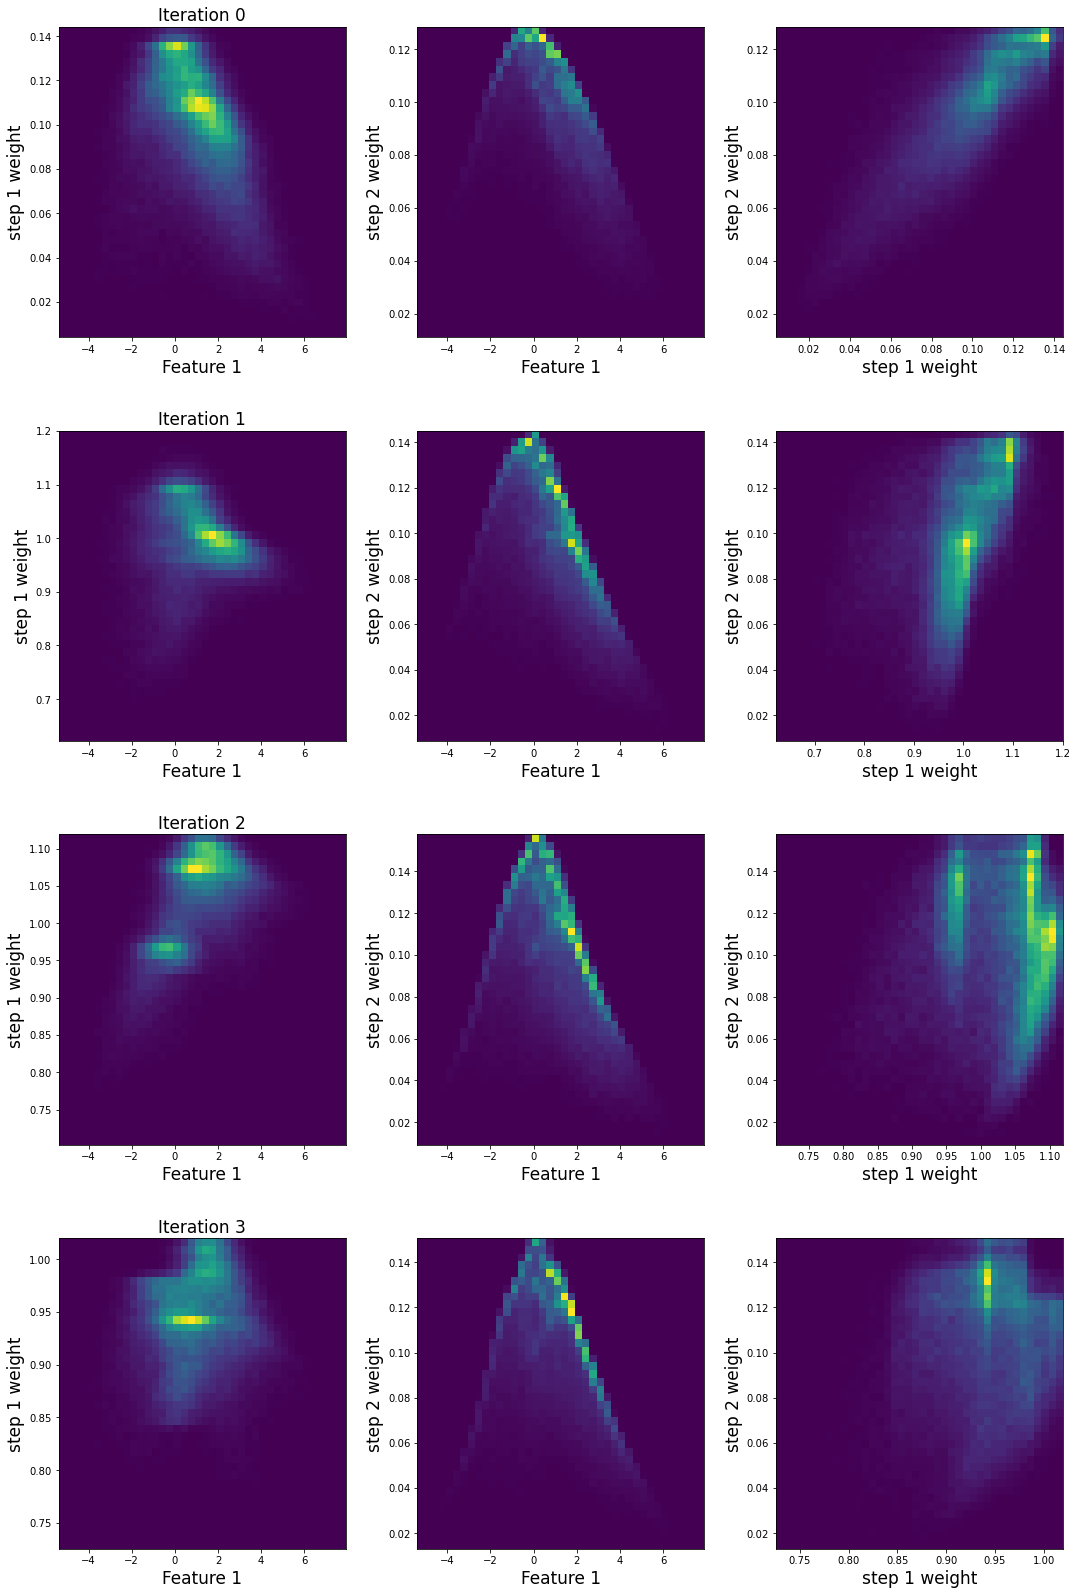

In [22]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,1], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,1], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

In [23]:
max_step2_weight = np.max( of_weights[3,1,:] )

<function matplotlib.pyplot.show(close=None, block=None)>

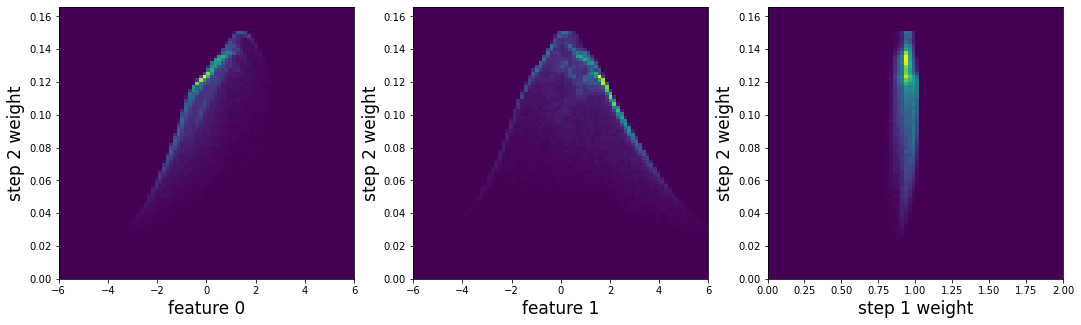

In [24]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))

hmin=-6
hmax=6
hbins=80

ax[0].hist2d( train_pts[:,0], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[1].hist2d( train_pts[:,1], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[2].hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[hbins,hbins], range=([0.,2.],[0.,1.1*max_step2_weight]))


lfontsize = 17

ax[0].set_xlabel( 'feature 0', fontsize=lfontsize )
ax[0].set_ylabel( 'step 2 weight', fontsize=lfontsize )


ax[1].set_xlabel( 'feature 1', fontsize=lfontsize )
ax[1].set_ylabel( 'step 2 weight', fontsize=lfontsize )

ax[2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
ax[2].set_ylabel( 'step 2 weight', fontsize=lfontsize )


plt.show


## Do the bootstrap samples in a loop

In [25]:
n_boot_samples = 100

do_bootstrap = True

verbose = False

bootstrap_weights = np.zeros( shape=(n_boot_samples, len(train_pts) ))

In [26]:
%%time

rng = np.random.default_rng()

for bi in range(0,n_boot_samples) :
    
    if do_bootstrap :
        print("\n Creating bootstrap sample %3d" % bi )
        #boot_true_det_pts = np.random.Generator.choice( true_det_pts, size=len(true_det_pts) )
        boot_true_det_pts = rng.choice( true_det_pts, size=len(true_det_pts) )
        
    else :
        print("\n Creating toy sample %3d" % bi )
        boot_true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)
        boot_true_det_pts = np.random.normal( boot_true_pts, [res0, res1])
        
    boot_of_weights = of.omnifold( train_both, boot_true_det_pts, of_niter, model, verbose)
    
    bootstrap_weights[bi] = boot_of_weights[3,1,:]
    


 Creating bootstrap sample   0
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample   1
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample   2
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample   3
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample   4
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample   5
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample   6
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample   7
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample   8
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample   9
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample  10
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample  11
10/10 [====

10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample  12
10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample  13
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample  14
10/10 [==============================] - 0s 801us/step

 Creating bootstrap sample  15
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  16
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample  17
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample  18
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample  19
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample  20
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample  21
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample  22
10/10 [==============================] - 0s

10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample  24
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  25
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample  26
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample  27
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample  28
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample  29
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample  30
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample  31
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample  32
10/10 [==============================] - 0s 840us/step

 Creating bootstrap sample  33
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample  34
10/10 [==============================] - 0s

10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample  36
10/10 [==============================] - 0s 667us/step

 Creating bootstrap sample  37
10/10 [==============================] - 0s 803us/step

 Creating bootstrap sample  38
10/10 [==============================] - 0s 612us/step

 Creating bootstrap sample  39
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample  40
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample  41
10/10 [==============================] - 0s 678us/step

 Creating bootstrap sample  42
10/10 [==============================] - 0s 651us/step

 Creating bootstrap sample  43
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample  44
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample  45
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample  46
10/10 [==============================] - 0s

10/10 [==============================] - 0s 631us/step

 Creating bootstrap sample  48
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample  49
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample  50
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample  51
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample  52
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample  53
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample  54
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample  55
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample  56
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample  57
10/10 [==============================] - 0s 645us/step

 Creating bootstrap sample  58
10/10 [==============================] - 0s

10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample  60
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample  61
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample  62
10/10 [==============================] - 0s 643us/step

 Creating bootstrap sample  63
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample  64
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample  65
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample  66
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample  67
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample  68
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample  69
10/10 [==============================] - 0s 779us/step

 Creating bootstrap sample  70
10/10 [==============================] - 0s

10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  72
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample  73
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample  74
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample  75
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample  76
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample  77
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample  78
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample  79
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample  80
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample  81
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample  82
10/10 [==============================] - 0s

10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample  83
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample  84
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample  85
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample  86
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample  87
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample  88
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample  89
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample  90
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample  91
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample  92
10/10 [==============================] - 0s 760us/step

 Creating bootstrap sample  93
10/10 [==============================] - 0s

10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample  95
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample  96
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample  97
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample  98
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample  99
10/10 [==============================] - 0s 718us/step
CPU times: user 55min 21s, sys: 4min 59s, total: 1h 20s
Wall time: 44min 37s


In [27]:
bootstrap_weights

array([[0.07861238, 0.12795757, 0.08191825, ..., 0.02706999, 0.1024921 ,
        0.12486709],
       [0.08653135, 0.12601443, 0.08605371, ..., 0.03294931, 0.09962975,
        0.13069938],
       [0.08095153, 0.12954304, 0.0831295 , ..., 0.02869027, 0.08845292,
        0.13174871],
       ...,
       [0.07892848, 0.14781836, 0.08111504, ..., 0.03369312, 0.1114796 ,
        0.14261661],
       [0.08155078, 0.13032903, 0.08369369, ..., 0.02565151, 0.10471409,
        0.12774353],
       [0.08183833, 0.13605663, 0.08456939, ..., 0.02789115, 0.10248567,
        0.13594753]])

In [28]:
of_weights[3,1,:]

array([0.09465298, 0.13453725, 0.09203108, ..., 0.03426026, 0.10854194,
       0.13583712])

In [29]:
bootstrap_weights[0]

array([0.07861238, 0.12795757, 0.08191825, ..., 0.02706999, 0.1024921 ,
       0.12486709])

In [30]:
np.cov( bootstrap_weights[:,0])

array(2.20800737e-05)

In [31]:
bootstrap_weights[:,100]

array([0.05175317, 0.05767109, 0.05505211, 0.06383496, 0.05854812,
       0.05432521, 0.05498909, 0.04977614, 0.05984133, 0.05616412,
       0.04998958, 0.06429905, 0.05428286, 0.05516342, 0.06398666,
       0.04977861, 0.0576578 , 0.05684428, 0.0501037 , 0.0520184 ,
       0.05324103, 0.05802754, 0.04819135, 0.05490421, 0.05720415,
       0.05590918, 0.05524039, 0.05355615, 0.06191519, 0.04692332,
       0.05426606, 0.05221583, 0.04909256, 0.04905882, 0.06259485,
       0.05338244, 0.05566807, 0.04993829, 0.05418591, 0.05496484,
       0.04848954, 0.05372666, 0.05729003, 0.06258762, 0.05640667,
       0.04701523, 0.05973858, 0.04772251, 0.05948761, 0.05510515,
       0.05494946, 0.05300155, 0.05845594, 0.0562111 , 0.05529562,
       0.05169848, 0.05899378, 0.06311288, 0.05811791, 0.05775815,
       0.05658791, 0.06104027, 0.05715204, 0.05179932, 0.06352688,
       0.06459213, 0.06086151, 0.06103699, 0.06114426, 0.06017745,
       0.0549907 , 0.05745112, 0.05580344, 0.06705491, 0.06418

<function matplotlib.pyplot.show(close=None, block=None)>

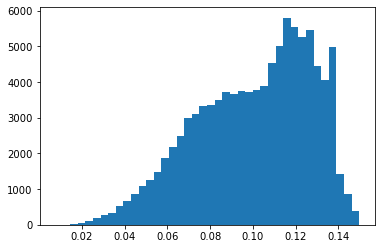

In [32]:
plt.hist( bootstrap_weights[1,:], bins=40)
plt.show

In [33]:
np.mean( bootstrap_weights, axis=0 )

array([0.08471863, 0.12838423, 0.08425933, ..., 0.0252486 , 0.10245402,
       0.13293465])

In [34]:
bootstrap_w2 = bootstrap_weights * bootstrap_weights

In [35]:
bootstrap_w2

array([[0.00617991, 0.01637314, 0.0067106 , ..., 0.00073278, 0.01050463,
        0.01559179],
       [0.00748767, 0.01587964, 0.00740524, ..., 0.00108566, 0.00992609,
        0.01708233],
       [0.00655315, 0.0167814 , 0.00691051, ..., 0.00082313, 0.00782392,
        0.01735772],
       ...,
       [0.0062297 , 0.02185027, 0.00657965, ..., 0.00113523, 0.0124277 ,
        0.0203395 ],
       [0.00665053, 0.01698566, 0.00700463, ..., 0.000658  , 0.01096504,
        0.01631841],
       [0.00669751, 0.01851141, 0.00715198, ..., 0.00077792, 0.01050331,
        0.01848173]])

In [36]:
bootstrap_variance = np.mean( bootstrap_w2, axis=0 ) - np.mean( bootstrap_weights, axis=0 ) * np.mean( bootstrap_weights, axis=0 )

In [37]:
bootstrap_variance

array([2.18592729e-05, 3.43658015e-05, 2.23174963e-05, ...,
       4.73312882e-05, 2.20587693e-05, 3.38814091e-05])

In [38]:
bootstrap_rms = np.sqrt( bootstrap_variance )

In [39]:
bootstrap_rms

array([0.00467539, 0.00586224, 0.00472414, ..., 0.00687977, 0.00469668,
       0.00582077])

In [40]:
col_vec = np.array([[11],[22],[33]])

In [41]:
col_vec

array([[11],
       [22],
       [33]])

In [42]:
row_vec = col_vec.T

In [43]:
row_vec

array([[11, 22, 33]])

In [44]:
col_times_row = col_vec * row_vec

In [45]:
col_times_row

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [46]:
col_vec.shape

(3, 1)

In [47]:
row_vec.shape

(1, 3)

In [48]:
col_times_row.shape

(3, 3)

In [49]:
row_times_col = row_vec * col_vec

In [50]:
row_times_col

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [51]:
row_times_row = row_vec * row_vec

In [52]:
row_times_row

array([[ 121,  484, 1089]])

In [53]:
#row_dot_row = np.dot(row_vec,row_vec)

In [54]:
row_dot_col = np.dot(row_vec,col_vec)

In [55]:
row_dot_col

array([[1694]])

In [56]:
row_dot_col.shape

(1, 1)

In [57]:
col_dot_row = np.dot(col_vec,row_vec)

In [58]:
col_dot_row

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [59]:
bootstrap_weights.shape

(100, 100000)

In [60]:
bootstrap_weights.T

array([[0.07861238, 0.08653135, 0.08095153, ..., 0.07892848, 0.08155078,
        0.08183833],
       [0.12795757, 0.12601443, 0.12954304, ..., 0.14781836, 0.13032903,
        0.13605663],
       [0.08191825, 0.08605371, 0.0831295 , ..., 0.08111504, 0.08369369,
        0.08456939],
       ...,
       [0.02706999, 0.03294931, 0.02869027, ..., 0.03369312, 0.02565151,
        0.02789115],
       [0.1024921 , 0.09962975, 0.08845292, ..., 0.1114796 , 0.10471409,
        0.10248567],
       [0.12486709, 0.13069938, 0.13174871, ..., 0.14261661, 0.12774353,
        0.13594753]])

In [61]:
bootstrap_weights.T.shape

(100000, 100)

In [62]:
bootstrap_weights_dot = np.dot( bootstrap_weights, bootstrap_weights.T )

In [63]:
bootstrap_weights_dot

array([[ 994.19199288, 1036.45020355, 1010.59887054, ..., 1072.69946247,
        1000.16957438, 1057.52795993],
       [1036.45020355, 1086.66121001, 1057.87650647, ..., 1118.79118252,
        1044.44104547, 1104.50049298],
       [1010.59887054, 1057.87650647, 1033.31483964, ..., 1092.5755496 ,
        1018.79910005, 1078.35265122],
       ...,
       [1072.69946247, 1118.79118252, 1092.5755496 , ..., 1165.85560944,
        1083.29377571, 1144.58656514],
       [1000.16957438, 1044.44104547, 1018.79910005, ..., 1083.29377571,
        1011.95792898, 1066.67493787],
       [1057.52795993, 1104.50049298, 1078.35265122, ..., 1144.58656514,
        1066.67493787, 1131.11981878]])

In [64]:
bootstrap_weights_dot.shape

(100, 100)

In [65]:
#bootstrap_weights_dot2 = np.dot( bootstrap_weights.T, bootstrap_weights )

In [66]:
#bootstrap_weights_dot2

In [67]:
bootstrap_weights[:,0]

array([0.07861238, 0.08653135, 0.08095153, 0.08913858, 0.09134648,
       0.08940109, 0.08796127, 0.09013217, 0.08218691, 0.07993989,
       0.09126396, 0.09343757, 0.08905298, 0.08734303, 0.08616344,
       0.08286252, 0.07413219, 0.08290002, 0.08614342, 0.07422695,
       0.08553549, 0.08183667, 0.07041462, 0.08250339, 0.07886471,
       0.07458941, 0.08844639, 0.0851668 , 0.09230447, 0.08243211,
       0.08537644, 0.08432806, 0.07828302, 0.08752852, 0.08820966,
       0.08558345, 0.08293168, 0.08395713, 0.08178336, 0.08095426,
       0.07995801, 0.08821037, 0.08704887, 0.08559139, 0.08828282,
       0.08761594, 0.08997069, 0.0821107 , 0.08824535, 0.08135761,
       0.09263451, 0.087664  , 0.08213434, 0.08231508, 0.0903345 ,
       0.08178481, 0.08649518, 0.08511048, 0.07997622, 0.08503429,
       0.08574919, 0.08278862, 0.0839551 , 0.08905248, 0.08592856,
       0.08348459, 0.07585691, 0.08489452, 0.07740515, 0.0833924 ,
       0.07697336, 0.08417084, 0.08205204, 0.08899526, 0.08850

In [68]:
bootstrap_weights[:,1]

array([0.12795757, 0.12601443, 0.12954304, 0.13130192, 0.1299264 ,
       0.12543373, 0.12868507, 0.14553657, 0.12995559, 0.13366111,
       0.13351159, 0.12858598, 0.12674749, 0.12065034, 0.12806506,
       0.13251927, 0.1246129 , 0.12470647, 0.11942384, 0.13451111,
       0.13311452, 0.12584691, 0.12867436, 0.12352602, 0.12600148,
       0.13042772, 0.12599424, 0.1346512 , 0.12258006, 0.12206968,
       0.13355076, 0.12624848, 0.12573726, 0.13157213, 0.13165264,
       0.13579418, 0.1309253 , 0.12145216, 0.12317782, 0.14692898,
       0.13383684, 0.12093005, 0.12517208, 0.12090848, 0.13548671,
       0.1216141 , 0.11910152, 0.12761256, 0.12738089, 0.12506962,
       0.1304784 , 0.13642406, 0.12480313, 0.1318465 , 0.13387172,
       0.13304608, 0.12330861, 0.12791049, 0.12069059, 0.12391466,
       0.13197021, 0.12418193, 0.12510666, 0.12819839, 0.13555796,
       0.13515928, 0.13034931, 0.12092679, 0.12961438, 0.1179353 ,
       0.12190129, 0.13019805, 0.1253434 , 0.12176818, 0.11723

In [69]:
combined = np.column_stack( (bootstrap_weights[:,0], bootstrap_weights[:,1]))

In [70]:
combined

array([[0.07861238, 0.12795757],
       [0.08653135, 0.12601443],
       [0.08095153, 0.12954304],
       [0.08913858, 0.13130192],
       [0.09134648, 0.1299264 ],
       [0.08940109, 0.12543373],
       [0.08796127, 0.12868507],
       [0.09013217, 0.14553657],
       [0.08218691, 0.12995559],
       [0.07993989, 0.13366111],
       [0.09126396, 0.13351159],
       [0.09343757, 0.12858598],
       [0.08905298, 0.12674749],
       [0.08734303, 0.12065034],
       [0.08616344, 0.12806506],
       [0.08286252, 0.13251927],
       [0.07413219, 0.1246129 ],
       [0.08290002, 0.12470647],
       [0.08614342, 0.11942384],
       [0.07422695, 0.13451111],
       [0.08553549, 0.13311452],
       [0.08183667, 0.12584691],
       [0.07041462, 0.12867436],
       [0.08250339, 0.12352602],
       [0.07886471, 0.12600148],
       [0.07458941, 0.13042772],
       [0.08844639, 0.12599424],
       [0.0851668 , 0.1346512 ],
       [0.09230447, 0.12258006],
       [0.08243211, 0.12206968],
       [0.

In [71]:
pair_cov = np.cov( combined )

In [72]:
pair_cov

array([[0.00121747, 0.00097415, 0.00119888, ..., 0.00169969, 0.00120349,
        0.00133771],
       [0.00097415, 0.00077946, 0.00095927, ..., 0.00135999, 0.00096296,
        0.00107035],
       [0.00119888, 0.00095927, 0.00118057, ..., 0.00167373, 0.0011851 ,
        0.00131727],
       ...,
       [0.00169969, 0.00135999, 0.00167373, ..., 0.00237291, 0.00168016,
        0.00186755],
       [0.00120349, 0.00096296, 0.0011851 , ..., 0.00168016, 0.00118966,
        0.00132234],
       [0.00133771, 0.00107035, 0.00131727, ..., 0.00186755, 0.00132234,
        0.00146981]])

In [73]:
combined_row = np.row_stack( (bootstrap_weights[:,0], bootstrap_weights[:,2]))

In [74]:
combined_row

array([[0.07861238, 0.08653135, 0.08095153, 0.08913858, 0.09134648,
        0.08940109, 0.08796127, 0.09013217, 0.08218691, 0.07993989,
        0.09126396, 0.09343757, 0.08905298, 0.08734303, 0.08616344,
        0.08286252, 0.07413219, 0.08290002, 0.08614342, 0.07422695,
        0.08553549, 0.08183667, 0.07041462, 0.08250339, 0.07886471,
        0.07458941, 0.08844639, 0.0851668 , 0.09230447, 0.08243211,
        0.08537644, 0.08432806, 0.07828302, 0.08752852, 0.08820966,
        0.08558345, 0.08293168, 0.08395713, 0.08178336, 0.08095426,
        0.07995801, 0.08821037, 0.08704887, 0.08559139, 0.08828282,
        0.08761594, 0.08997069, 0.0821107 , 0.08824535, 0.08135761,
        0.09263451, 0.087664  , 0.08213434, 0.08231508, 0.0903345 ,
        0.08178481, 0.08649518, 0.08511048, 0.07997622, 0.08503429,
        0.08574919, 0.08278862, 0.0839551 , 0.08905248, 0.08592856,
        0.08348459, 0.07585691, 0.08489452, 0.07740515, 0.0833924 ,
        0.07697336, 0.08417084, 0.08205204, 0.08

In [75]:
pair_cov_rs = np.cov( combined_row )

In [76]:
pair_cov_rs

array([[2.20800737e-05, 3.00215362e-06],
       [3.00215362e-06, 2.25429255e-05]])

In [77]:
pair_cor = np.corrcoef(combined_row)

In [78]:
pair_cor

array([[1.        , 0.13456357],
       [0.13456357, 1.        ]])

In [79]:
pair_cor[0,1]

0.13456357406292568

In [80]:
ncalc = 100000
corr_array = np.zeros( ncalc )

point_index = 53

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


In [81]:
corr_array

array([-0.22193921,  0.71918472, -0.09870532, ...,  0.17817036,
        0.50722697,  0.28391598])

<function matplotlib.pyplot.show(close=None, block=None)>

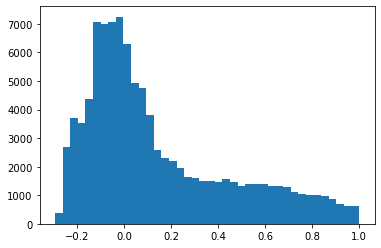

In [82]:
plt.hist( corr_array, bins=40)
plt.show

In [83]:
train_pts[point_index]

array([ 0.30820627, -0.18742389])

In [84]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

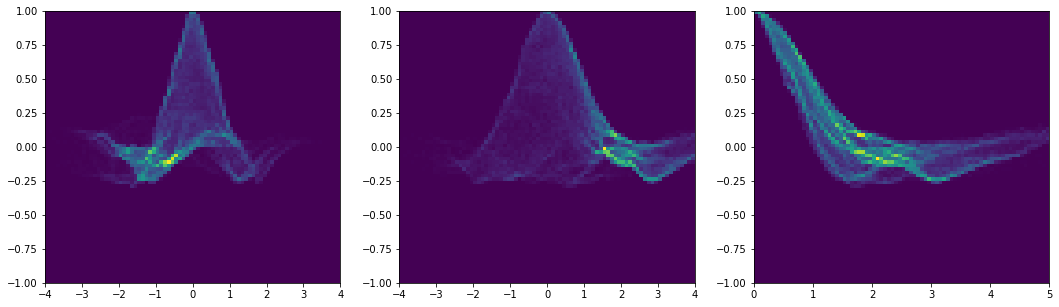

In [85]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr, corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [86]:
output_filebase = 'bootstrap-output-test1b'

In [87]:
with open( '%s.npy' % output_filebase, 'wb') as f :
    np.save(f, train_pts)
    np.save(f, train_det_pts)
    np.save(f, true_pts)
    np.save(f, true_det_pts)
    np.save(f, bootstrap_weights)
    

In [88]:
train_pts.shape

(100000, 2)

In [89]:
train_det_pts

array([[ 0.39013488,  2.65056086],
       [ 0.9036598 ,  0.91956245],
       [ 0.42644889,  1.35766071],
       ...,
       [-2.10158565,  5.8157137 ],
       [-0.96850872, -0.04008578],
       [ 1.5098503 , -0.67659905]])

In [90]:
true_det_pts

array([[ 0.48819728,  0.62984238],
       [-0.54296333,  4.20650107],
       [-1.47382645,  1.42721904],
       ...,
       [ 0.06113063,  3.24600645],
       [ 1.96456326, -0.90843271],
       [ 1.132528  ,  0.09859404]])

In [91]:
true_det_pts.shape

(10000, 2)

In [92]:
bootstrap_weights

array([[0.07861238, 0.12795757, 0.08191825, ..., 0.02706999, 0.1024921 ,
        0.12486709],
       [0.08653135, 0.12601443, 0.08605371, ..., 0.03294931, 0.09962975,
        0.13069938],
       [0.08095153, 0.12954304, 0.0831295 , ..., 0.02869027, 0.08845292,
        0.13174871],
       ...,
       [0.07892848, 0.14781836, 0.08111504, ..., 0.03369312, 0.1114796 ,
        0.14261661],
       [0.08155078, 0.13032903, 0.08369369, ..., 0.02565151, 0.10471409,
        0.12774353],
       [0.08183833, 0.13605663, 0.08456939, ..., 0.02789115, 0.10248567,
        0.13594753]])

In [93]:
bootstrap_weights.shape

(100, 100000)